In [1]:
import ssl 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import logging 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from collections import Counter

logger = logging.getLogger()


from frame_semantic_transformer import FrameSemanticTransformer

/var/folders/66/7zn69qrn4cg38jdkg3kkzj_m0000gr/T/ipykernel_41147/3591478787.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/avtk/miniconda3/envs/riveterEnv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')
nltk.download('framenet_v17')

[nltk_data] Downloading package wordnet to /Users/avtk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package framenet_v17 to
[nltk_data]     /Users/avtk/nltk_data...
[nltk_data]   Package framenet_v17 is already up-to-date!


True

In [3]:
semantic_frames_USA = pickle.load(open(f"../data/processed/frame_semantics/frame_semantics_US.pickle", "rb"))
semantic_frames_UK = pickle.load(open(f"../data/processed/frame_semantics/frame_semantics_UK.pickle", "rb"))
semantic_frames_middle_east = pickle.load(open(f"../data/processed/frame_semantics/frame_semantics_MiddleEast.pickle", "rb")) 

In [4]:
semantic_frames_USA['frame_semantics'][0].frames

[FrameResult(name='Killing', trigger_location=22, frame_elements=[]),
 FrameResult(name='Trial', trigger_location=31, frame_elements=[FrameElementResult(name='Charges', text='genocide'), FrameElementResult(name='Defendant', text='against Israel')])]

In [5]:
def get_semantic_frames(semantic_frames: dict):
    all_frames = []
    sentences = []
    semantics = []
    for item in semantic_frames['frame_semantics']:
        sentences.append(item.sentence)
        frames = [frame.name for frame in item.frames]
        all_frames.append(frames)
        semantics.append(item)
    print(all_frames, sentences)
    dict_ = {'Sentence': sentences, 'Frames': all_frames, 'Semantics': semantics} 
    return pd.DataFrame(dict_)

frames_US = get_semantic_frames(semantic_frames_USA)
frames_UK = get_semantic_frames(semantic_frames_UK)
frames_ME = get_semantic_frames(semantic_frames_middle_east)

[['Killing', 'Trial'], ['Candidness', 'Successful_action'], ['Calendric_unit'], ['Cogitation', 'Quitting', 'Statement'], ['Judgment', 'Position_on_a_scale', 'People_by_vocation'], ['Terrorism', 'Surrendering'], ['Sign_agreement', 'Used_up', 'Organization', 'Age', 'Calendric_unit'], ['Expressing_publicly', 'Level_of_force_exertion', 'Killing'], ['Leadership', 'Cause_change_of_position_on_a_scale', 'Education_teaching', 'Being_at_risk', 'Importing', 'Used_up', 'Transition_to_state'], ['Attack'], ['Warning', 'Weapon', 'Sending', 'Cotheme'], ['Seeking'], ['Leadership', 'Commitment', 'Response', 'Killing', 'Attack'], ['Opinion', 'Political_locales', 'Leadership', 'Death', 'Causation'], ['Sending', 'Time_vector', 'Calendric_unit'], ['Statement'], ['Attempt_suasion', 'Response', 'Supply', 'Increment'], ['Representative', 'Experiencer_obj', 'Body_parts', 'Transition_to_a_quality'], ['Quantified_mass', 'Remainder', 'Hostile_encounter'], ['Cause_motion'], ['Process_end', 'Hostile_encounter', 'Ar

In [5]:
def filtered_frames(df: pd.DataFrame, frame_name:str):
    filtered_df = df[df['Frames'].apply(lambda x: frame_name in x)]
    return filtered_df

def get_frame_element_counts(df: pd.DataFrame, frame_name:str):
    elements = {}
    for index,row in df.iterrows():
            for frame in row['Semantics'].frames: 
                if frame.name == frame_name and len(frame.frame_elements)>0:
                     for element in frame.frame_elements: 
                          if element.name in elements: 
                               elements[element.name] += 1 
                          else: 
                               elements[element.name] = 1
    return elements 

def get_frame_elements(df: pd.DataFrame, frame_name:str, frame_elements:list):
     df_rows = {'Sentence': [], 'timestamp': []}
     for element in frame_elements: 
          df_rows[element] = []
     print(df_rows)
     for index,row in df.iterrows():
          for frame in row['Semantics'].frames: 
               if frame.name == frame_name and len(frame.frame_elements)>0:
                    frame_element_names =  [element.name for element in frame.frame_elements]
                    if len(set(frame_elements).intersection(set(frame_element_names))) > 0:
                         df_rows['Sentence'].append(row['Sentence'])
                         df_rows['timestamp'].append(row['timestamp'])
                         for name in frame_elements:
                              if name not in frame_element_names:
                                   df_rows[name].append("")
                              else:
                                   for element in frame.frame_elements:
                                        if element.name == name: 
                                             df_rows[name].append(element.text)


                                        
     return(df_rows)

In [24]:
# Sort Frames
#sorted(Counter(frames_UK).items(), key=lambda item: item[1], reverse=True)
#sorted(Counter(frames_US).items(), key=lambda item: item[1], reverse=True)
#sorted(Counter(frames_ME).items(), key=lambda item: item[1], reverse=True)

#sorted(Counter(frames_ME['Frames'].value_counts()), key=lambda item: item[1], reverse=True)


/var/folders/66/7zn69qrn4cg38jdkg3kkzj_m0000gr/T/ipykernel_68156/797540393.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_counts, x='Frames', y='Frequency', palette='viridis')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Hostile_encounter'),
  Text(1, 0, 'Leadership'),
  Text(2, 0, 'Attack'),
  Text(3, 0, 'Killing'),
  Text(4, 0, 'Request'),
  Text(5, 0, 'Calendric_unit'),
  Text(6, 0, 'Political_locales'),
  Text(7, 0, 'Judgment_communication'),
  Text(8, 0, 'Buildings'),
  Text(9, 0, 'Kinship'),
  Text(10, 0, 'People'),
  Text(11, 0, 'Assistance'),
  Text(12, 0, 'Arriving'),
  Text(13, 0, 'Discussion'),
  Text(14, 0, 'Aggregate'),
  Text(15, 0, 'Military'),
  Text(16, 0, 'Interior_profile_relation'),
  Text(17, 0, 'Education_teaching'),
  Text(18, 0, 'Quantified_mass'),
  Text(19, 0, 'Taking_sides'),
  Text(20, 0, 'Make_agreement_on_action'),
  Text(21, 0, 'Time_vector'),
  Text(22, 0, 'Relative_time'),
  Text(23, 0, 'Increment'),
  Text(24, 0, 'Causation'),
  Text(25, 0, 'Locale_by_use'),
  Tex

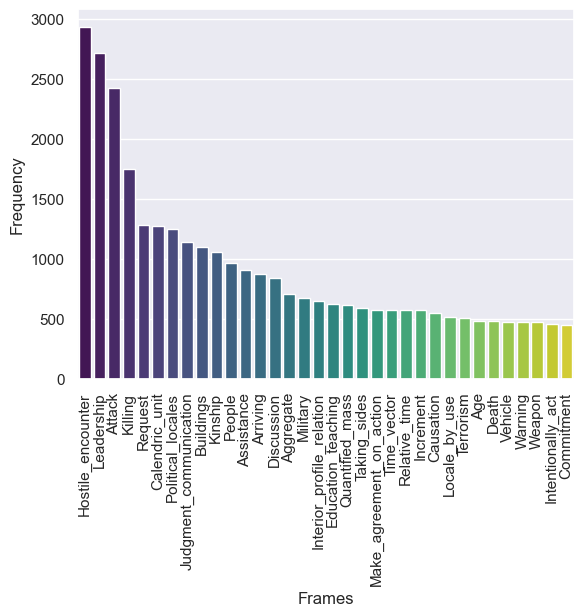

In [67]:
frames = pd.concat([frames_ME,frames_US,frames_UK])
all_frames = sum(list(frames['Frames']), [])
value_counts = pd.DataFrame(all_frames).value_counts()[1:35]
frames = [frame[0] for frame in value_counts.index.values]
Frequency = value_counts.values
df_counts =pd.DataFrame({'Frames':frames, 'Frequency':Frequency})
sns.barplot(df_counts, x='Frames', y='Frequency', palette='viridis')
plt.xticks(rotation=90)
#plt.title('Frequency of Semantic Frames in News Headlines (UK, US, Middle East)')

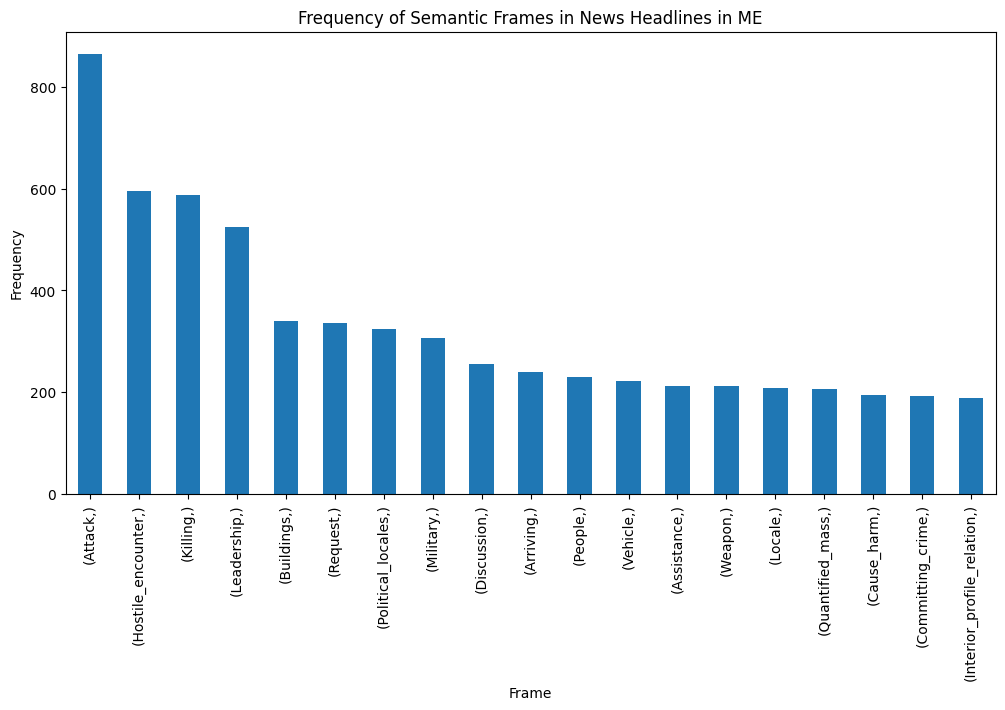

In [44]:
frames_ME['Frames'].values
all_frames_ME = sum(list(frames_ME['Frames']), [])
value_counts = pd.DataFrame(all_frames_ME).value_counts()[1:20]
df_counts = pd.DataFrame({'Frames':value_counts.index.values, 'Frequency':list(value_counts.values)})
df_counts.head()
value_counts.plot(kind='bar', figsize=(12,6))
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.title('Frequency of Semantic Frames in News Headlines in ME')
plt.show()

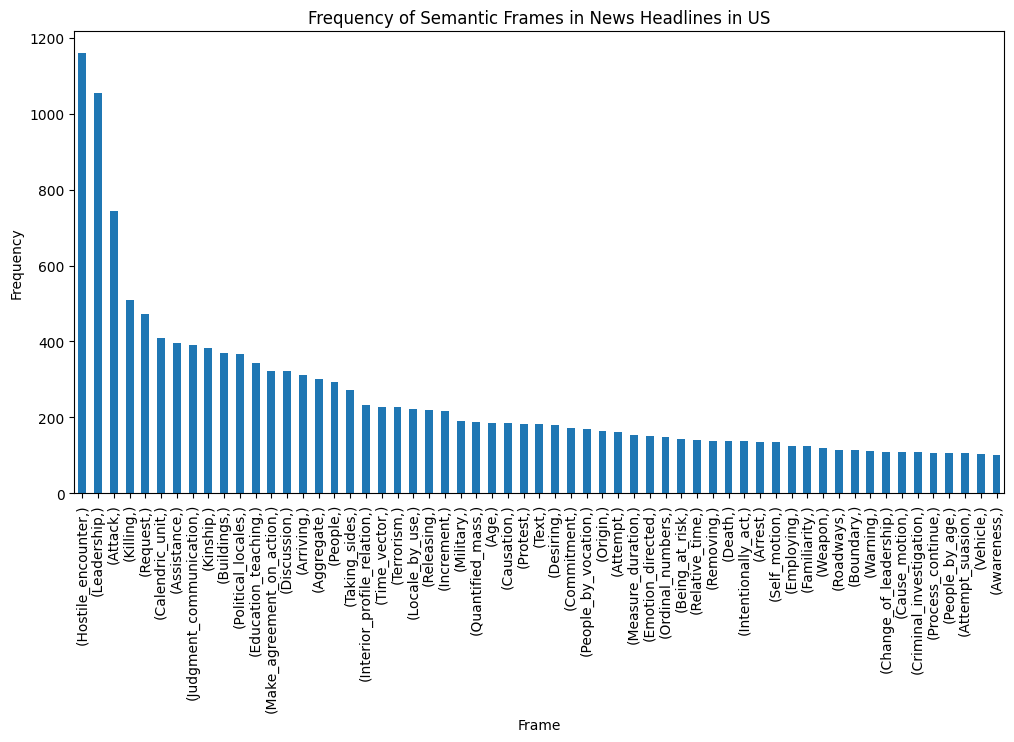

In [43]:
import seaborn as sns

frames_US['Frames'].values
all_frames_US = sum(list(frames_US['Frames']), [])
value_counts = pd.DataFrame(all_frames_US).value_counts()[1:60]
value_counts.plot(kind='bar', figsize=(12,6))
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.title('Frequency of Semantic Frames in News Headlines in US')
plt.show()

#sns.lineplot(value_counts)

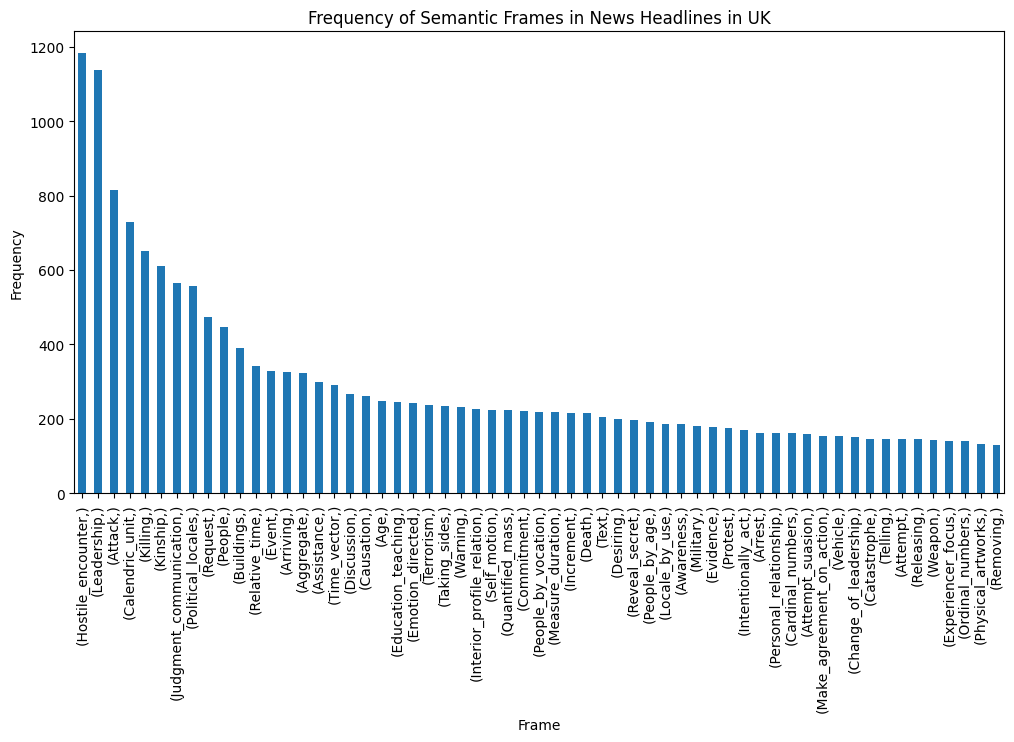

In [404]:
frames_UK['Frames'].values
all_frames_UK = sum(list(frames_UK['Frames']), [])
value_counts = pd.DataFrame(all_frames_UK).value_counts()[1:60]
value_counts.plot(kind='bar', figsize=(12,6))
plt.xlabel('Frame')
plt.ylabel('Frequency')
plt.title('Frequency of Semantic Frames in News Headlines in UK')
plt.show()

In [59]:
# Heatmap with Headlines
# Bubble Chart
# Word Cloud of prevelant frames 
# Topic Clustering with Frames 

#Bubble Chart
# x: Time 
# y: Topic Score 
# z: Prevelance 
           

In [60]:
# Analyse top Frames
# Entity Mentions 

In [71]:
all_data_uk = pd.read_csv("../data/raw/filtered_data/UK.csv") 
all_data_me = pd.read_csv("../data/raw/filtered_data/MiddleEast.csv") 
all_data_us = pd.read_csv("../data/raw/filtered_data/US.csv") 

In [72]:
frames_UK['timestamp'] = all_data_uk['date_publish']
frames_ME['timestamp'] = all_data_me['date_publish']
frames_US['timestamp'] = all_data_us['date_publish']
frames_UK['source_domain'] = all_data_uk['source_domain']
frames_ME['source_domain'] = all_data_me['source_domain']
frames_US['source_domain'] = all_data_us['source_domain']

In [187]:
frames_UK.head()

Sentence  \
0  Australian MPs plead for social cohesion amid ...   
1  LTA axes council member Wasim Haq over social ...   
2  Ryanair to reward shareholders as it heads for...   
3  Rishi Sunaks Struggles With Recession And By-E...   
4  'Do you know these people?': Met Police releas...   

                                              Frames            timestamp  \
0        [Entering_of_plea, Fear, Hostile_encounter]  2023-11-16 09:05:29   
1                  [Membership, Statement, Judgment]  2023-11-13 18:24:13   
2                              [Earnings_and_losses]  2023-11-06 08:39:55   
3    [Hostile_encounter, Change_position_on_a_scale]  2024-02-16 23:00:47   
4  [Awareness, People, Releasing, People, Awarene...  2023-11-27 18:54:31   

              source_domain  
0       www.theguardian.com  
1     www.independent.co.uk  
2       www.theguardian.com  
3  www.huffingtonpost.co.uk  
4       www.dailymail.co.uk

In [382]:
frames_UK.month = pd.to_datetime(frames_UK.timestamp).dt.month_name()

/var/folders/66/7zn69qrn4cg38jdkg3kkzj_m0000gr/T/ipykernel_28765/3469097416.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  frames_UK.month = pd.to_datetime(frames_UK.timestamp).dt.month_name()


In [383]:
frames_UK.month.value_counts()

timestamp
November     4013
January      1795
December     1787
February     1458
September      60
Name: count, dtype: int64

# Attack
### Looking at Assailents & Victims

### US 

In [94]:
frame_names = ['Attack', 'Killing', 'Causation', 'Cause_harm', 'Cause_change', 'Terrorism', 'Attempt', 'Destroying', 'Death']
frames_US_Attack = filtered_frames(frames_US, 'Attack')
elements_attack = get_frame_element_counts(frames_US_Attack, 'Attack')
print(elements_attack)
sorted(Counter(elements_attack).items(), key=lambda item: item[1], reverse=True)
frames_US_Attack.head()


{'Assailant': 434, 'Victim': 332, 'Manner': 43, 'Depictive': 12, 'Place': 135, 'Weapon': 95, 'Time': 104, 'Explanation': 22, 'Result': 13, 'Purpose': 19, 'Direction': 4, 'Circumstances': 3, 'Source': 7, 'Means': 14, 'Containing_event': 2, 'Path': 3, 'Area': 1}


Sentence  \
9   Israeli airstrikes on southern Gaza intensify ...   
12  President Biden vows to respond to the deadly ...   
22  FBI warns U.S. is facing highest risk of attac...   
23  Israeli woman who survived Hamas attack has gi...   
25  Several U.S. service members injured in missil...   

                                               Frames  \
9                                            [Attack]   
12  [Leadership, Commitment, Response, Killing, At...   
22        [Warning, Run_risk, Attack, Calendric_unit]   
23                                [Surviving, Attack]   
25  [Quantified_mass, Member_of_military, Cause_ha...   

                                            Semantics            timestamp  \
9   DetectFramesResult(sentence='Israeli airstrike...  2024-02-03 21:10:03   
12  DetectFramesResult(sentence='President Biden v...  2024-01-29 05:09:15   
22  DetectFramesResult(sentence='FBI warns U.S. is...  2023-12-05 23:07:00   
23  DetectFramesResult(sentence='Israeli woman who...  2024-02-08 16:12:08   
25  DetectFramesResult(sentence='Several U.S. serv...  2023-11-21 19:16:00   

      source_domain  
9        nypost.com  
12      www.npr.org  
22  www.cbsnews.com  
23       nypost.com  
25  www.cbsnews.com

{'Sentence': [], 'timestamp': [], 'Assailant': [], 'Victim': []}
Sentence 567
timestamp 567
Assailant 567
Victim 567
Assailant
            133
Hamas        82
Israeli      51
Israel       47
U.S.         30
Israel's     12
who          12
US           12
its          10
Iran          9
Name: count, dtype: int64


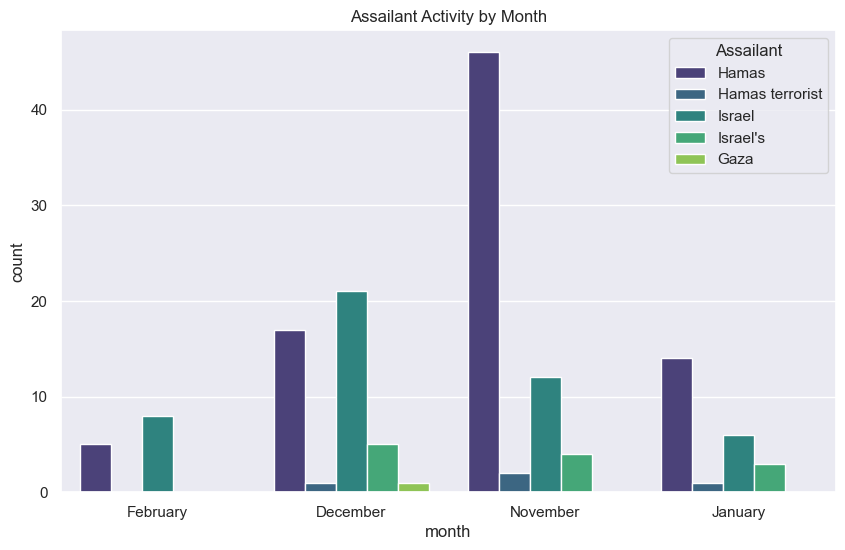

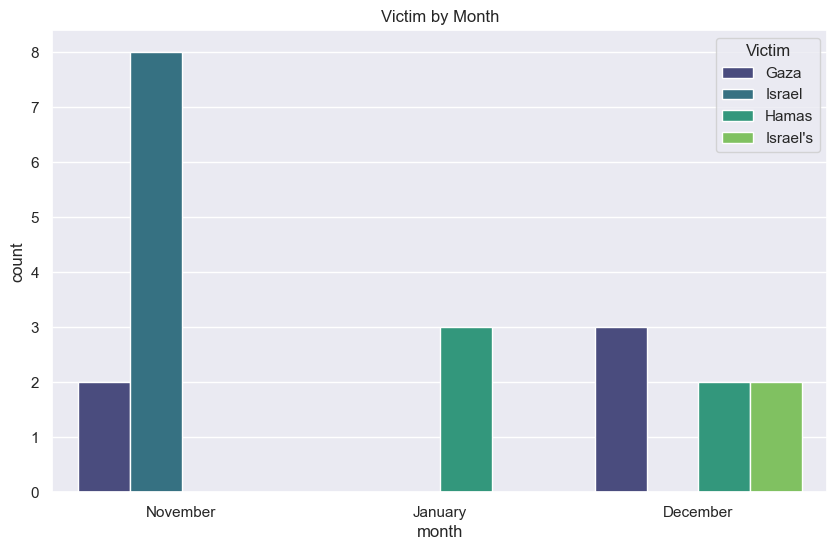

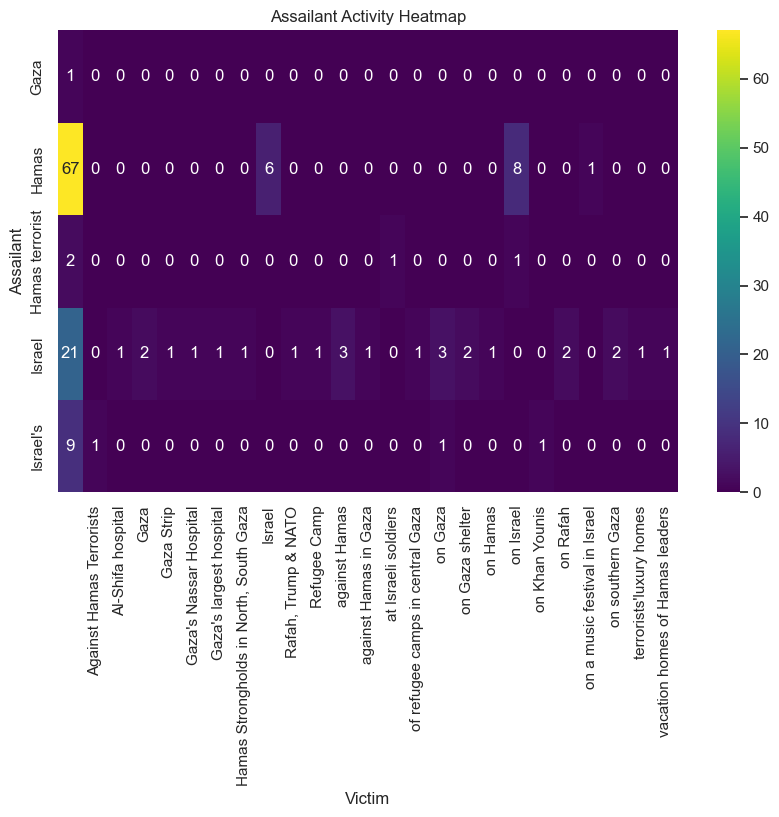

In [159]:
rows = get_frame_elements(frames_US_Attack,'Attack',['Assailant','Victim'])
for element in rows: 
    print(element,len(rows[element]))
df = pd.DataFrame(rows)
df['month'] = pd.to_datetime(df.timestamp).dt.month_name()
print(df.Assailant.value_counts()[:10])
filtered_df_assailant = df[df['Assailant'].apply(lambda x: x in ["Hamas", "Gaza", "Israel","Israel's", "Hamas terrorist"])]
filtered_df_victim = df[df['Victim'].apply(lambda x: x in ["Hamas", "Gaza","Israel", "Israel's", "Hamas terrorist"])]
#plt.hist(filtered_df_assailant.month.values,filtered_df_assailant.Assailant.values)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='Assailant', data=filtered_df_assailant, palette='viridis')
plt.title('Assailant Activity by Month')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='Victim', data=filtered_df_victim, palette='viridis')
plt.title('Victim by Month')
plt.show()

pivot_table = filtered_df_assailant.pivot_table(index='Assailant', columns='Victim', aggfunc='size', fill_value=0)

# Then, create a heatmap from the pivot table
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Assailant Activity Heatmap')
plt.show()

<Axes: xlabel='Victim'>

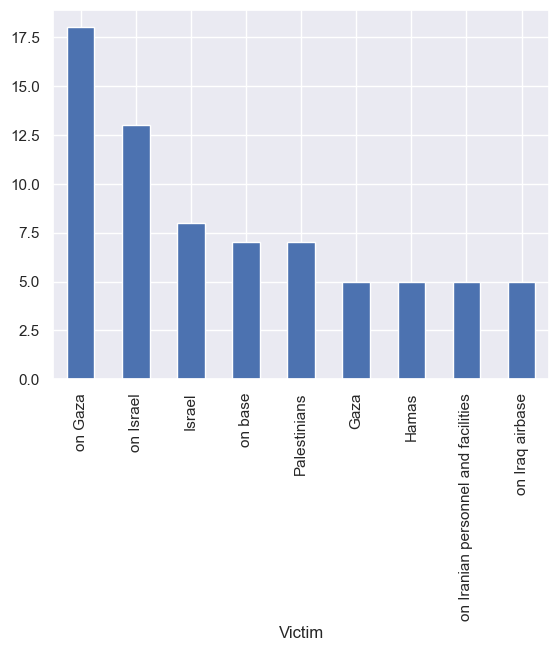

In [160]:
vals = df.Victim.value_counts()[:10]
us = vals[vals.keys() != ""]
us.plot(kind="bar")

### UK

{'Assailant': 502, 'Weapon': 109, 'Means': 18, 'Time': 116, 'Victim': 366, 'Result': 18, 'Explanation': 30, 'Place': 102, 'Purpose': 38, 'Manner': 56, 'Path': 3, 'Particular_iteration': 3, 'Depictive': 7, 'Source': 10, 'Circumstances': 2, 'Target': 2, 'Direction': 3, 'Event_description': 4, 'Containing_event': 2, 'Frequency': 1, 'Agent': 1, 'Iterations': 1}
{'Sentence': [], 'timestamp': [], 'Assailant': [], 'Victim': []}
Sentence 638
timestamp 638
Assailant 638
Victim 638
Assailant
                   136
Hamas               74
Israeli             71
Israel              30
US                  21
Rafah               20
Hamas'              14
Iran                12
Hamas terrorist     11
Israel ’s           10
Name: count, dtype: int64


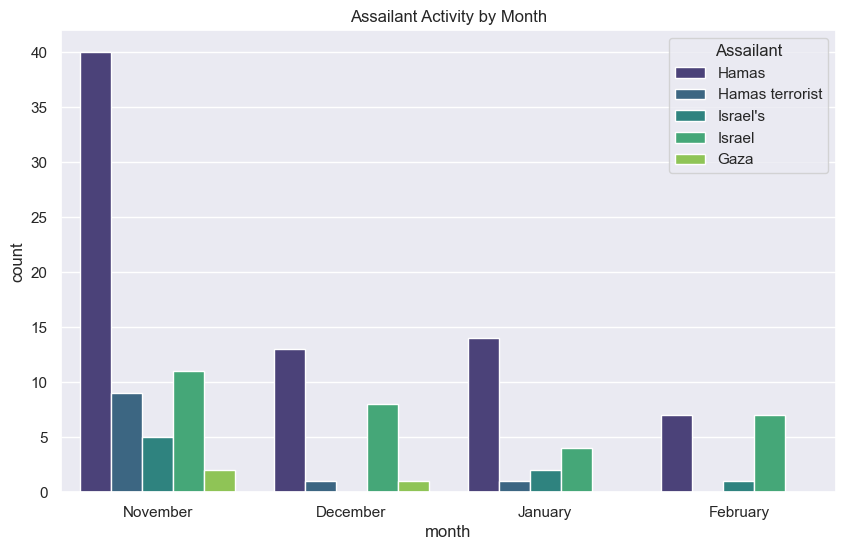

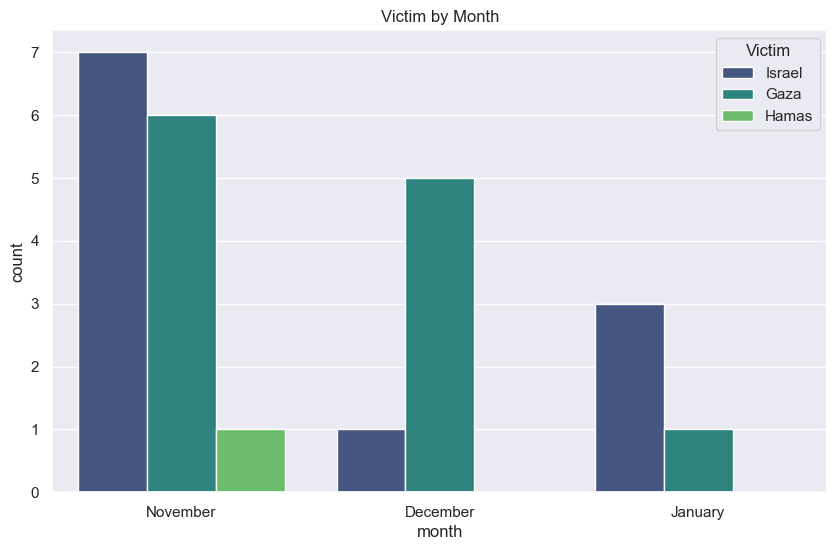

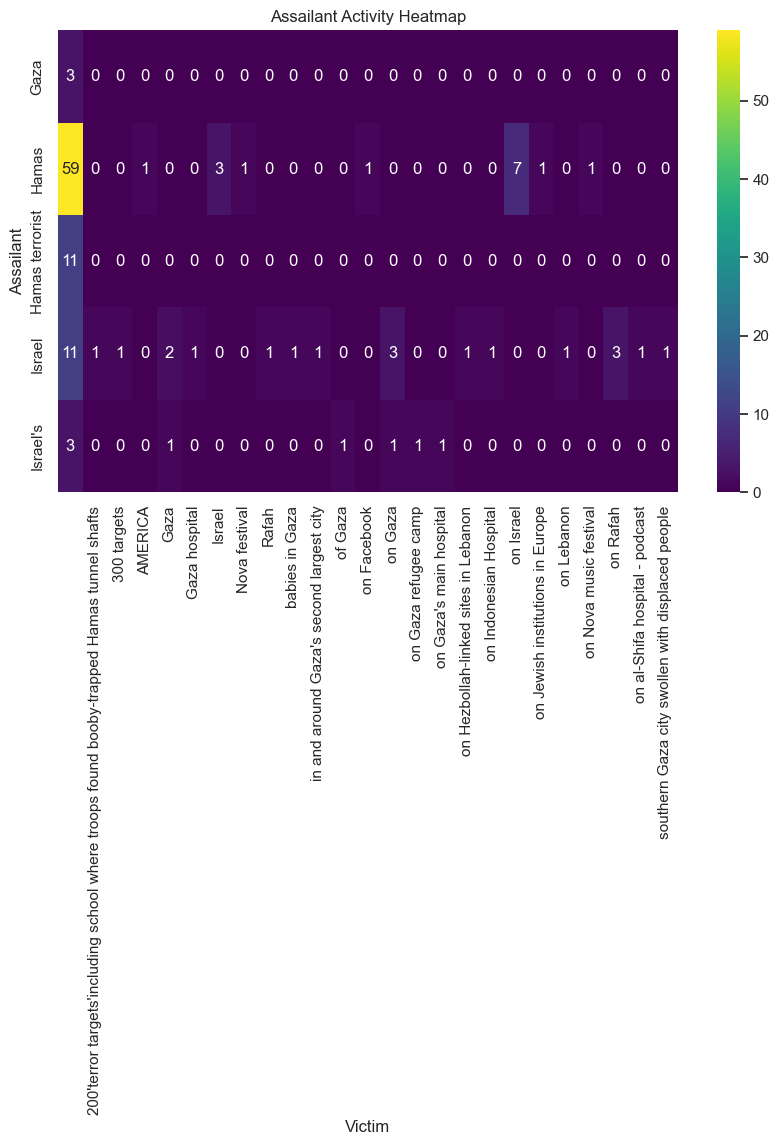

In [161]:
frames_UK_Attack = filtered_frames(frames_UK, 'Attack')
elements_attack = get_frame_element_counts(frames_UK_Attack, 'Attack')
print(elements_attack)
sorted(Counter(elements_attack).items(), key=lambda item: item[1], reverse=True)
frames_UK_Attack.head()
rows = get_frame_elements(frames_UK_Attack,'Attack',['Assailant','Victim'])
for element in rows: 
    print(element,len(rows[element]))
df = pd.DataFrame(rows)
df['month'] = pd.to_datetime(df.timestamp).dt.month_name()
print(df.Assailant.value_counts()[:10])
filtered_df_assailant = df[df['Assailant'].apply(lambda x: x in ["Hamas", "Gaza", "Israel","Israel's", "Hamas terrorist"])]
filtered_df_victim = df[df['Victim'].apply(lambda x: x in ["Hamas", "Gaza", "Israel","Israel's", "Hamas terrorist"])]
#plt.hist(filtered_df_assailant.month.values,filtered_df_assailant.Assailant.values)

plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='Assailant', data=filtered_df_assailant, palette='viridis')
plt.title('Assailant Activity by Month')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='Victim', data=filtered_df_victim, palette='viridis')
plt.title('Victim by Month')
plt.show()

pivot_table = filtered_df_assailant.pivot_table(index='Assailant', columns='Victim', aggfunc='size', fill_value=0)

# Then, create a heatmap from the pivot table
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Assailant Activity Heatmap')
plt.show()

<Axes: xlabel='Victim'>

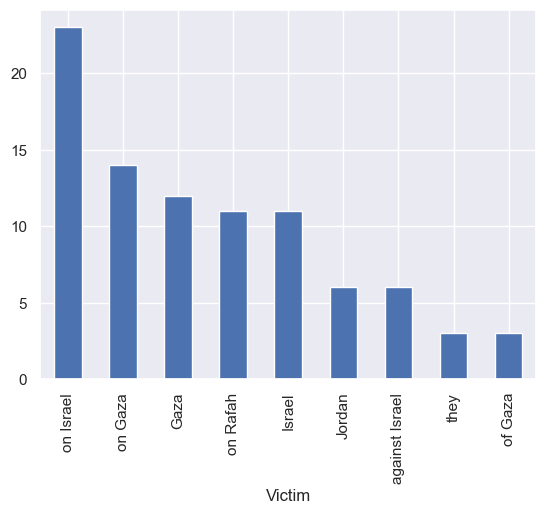

In [162]:
vals = df.Victim.value_counts()[:10]
uk = vals[vals.keys() != ""]
uk.plot(kind="bar")

### ME

{'Assailant': 625, 'Victim': 585, 'Means': 20, 'Weapon': 128, 'Manner': 76, 'Particular_iteration': 5, 'Place': 136, 'Depictive': 13, 'Source': 13, 'Explanation': 6, 'Time': 40, 'Purpose': 10, 'Direction': 4, 'Containing_event': 2, 'Iterations': 1, 'Duration': 2, 'Goal': 1, 'Path': 3, 'Event_description': 2, 'Area': 1, 'Result': 3}
{'Sentence': [], 'timestamp': [], 'Assailant': [], 'Victim': []}
Sentence 761
timestamp 761
Assailant 761
Victim 761
Assailant
Israeli               209
                      136
Israeli warplanes      55
Israel                 37
Zionist                21
US                     19
Al-Qassam Brigades     17
Hamas                  15
Israeli occupation     11
Iraqi Resistance        9
Name: count, dtype: int64


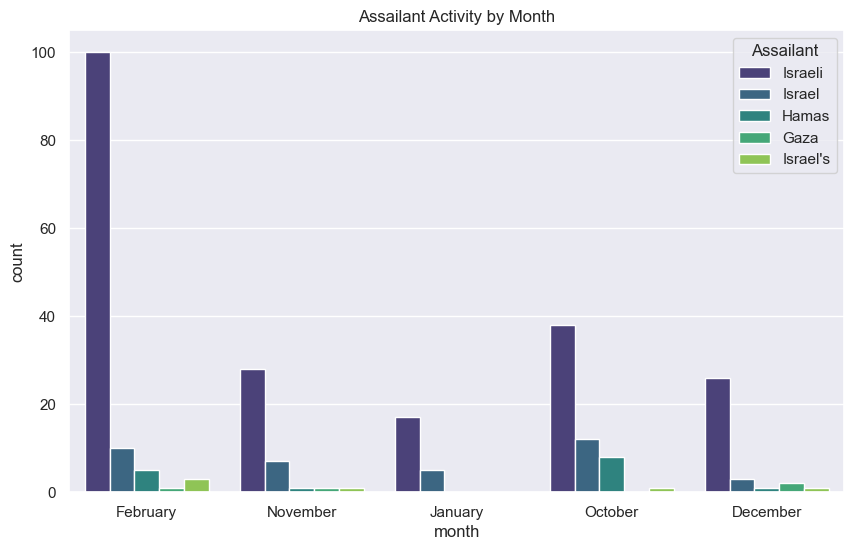

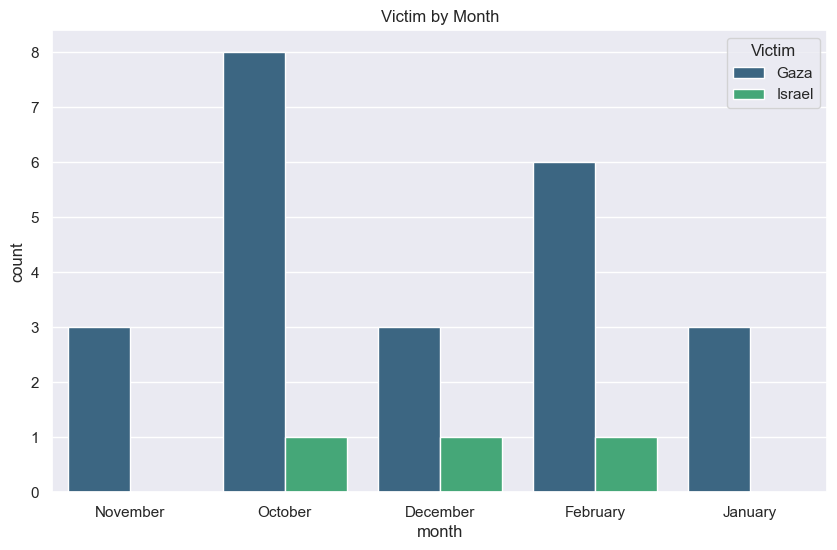

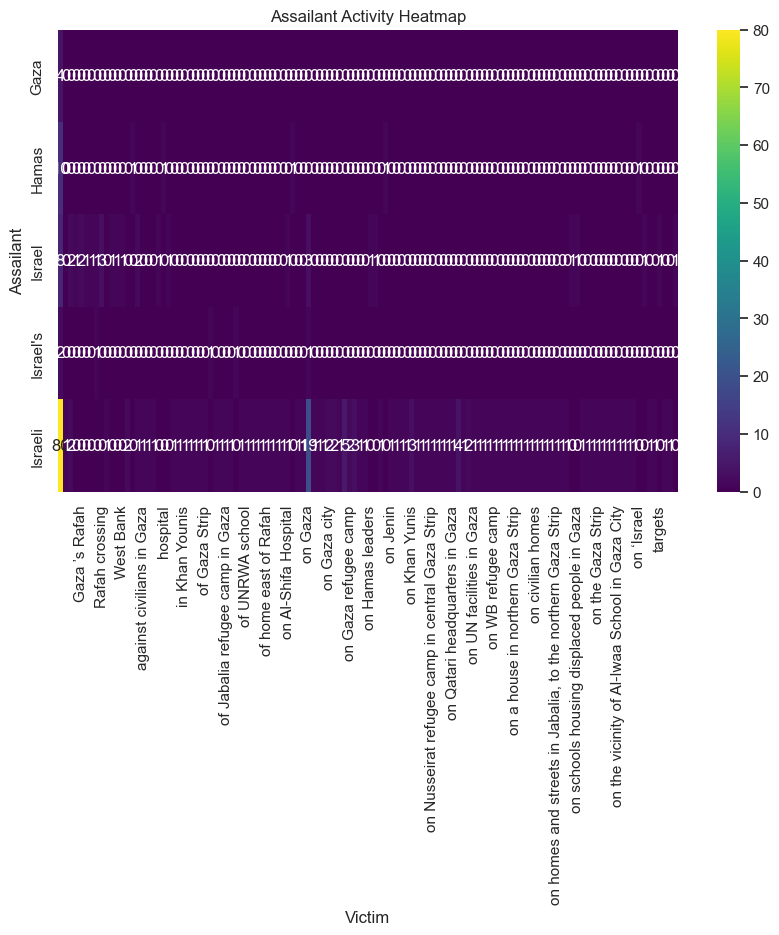

In [163]:
frames_ME_Attack = filtered_frames(frames_ME, 'Attack')
elements_attack = get_frame_element_counts(frames_ME_Attack, 'Attack')
print(elements_attack)
sorted(Counter(elements_attack).items(), key=lambda item: item[1], reverse=True)
frames_ME_Attack.head()
rows = get_frame_elements(frames_ME_Attack,'Attack',['Assailant','Victim'])
for element in rows: 
    print(element,len(rows[element]))
df = pd.DataFrame(rows)
df['month'] = pd.to_datetime(df.timestamp).dt.month_name()
print(df.Assailant.value_counts()[:10])
filtered_df_assailant = df[df['Assailant'].apply(lambda x: x in ["Israeli", "Israeli Occupation", "Hamas", "Gaza", "Israel","Israel's", "Hamas terrorist"])]
filtered_df_victim = df[df['Victim'].apply(lambda x: x in ["Palestine","Hamas", "Gaza", "Israel","Israel's", "Hamas terrorist"])]
#plt.hist(filtered_df_assailant.month.values,filtered_df_assailant.Assailant.values)

plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='Assailant', data=filtered_df_assailant, palette='viridis')
plt.title('Assailant Activity by Month')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='Victim', data=filtered_df_victim, palette='viridis')
plt.title('Victim by Month')
plt.show()

pivot_table = filtered_df_assailant.pivot_table(index='Assailant', columns='Victim', aggfunc='size', fill_value=0)

# Then, create a heatmap from the pivot table
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Assailant Activity Heatmap')
plt.show()

<Axes: xlabel='Victim'>

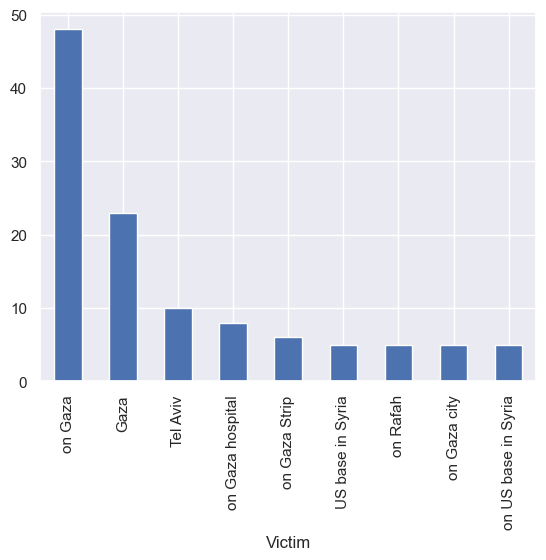

In [164]:
vals = df.Victim.value_counts()[:10]
me = vals[vals.keys() != ""]
me.plot(kind="bar")


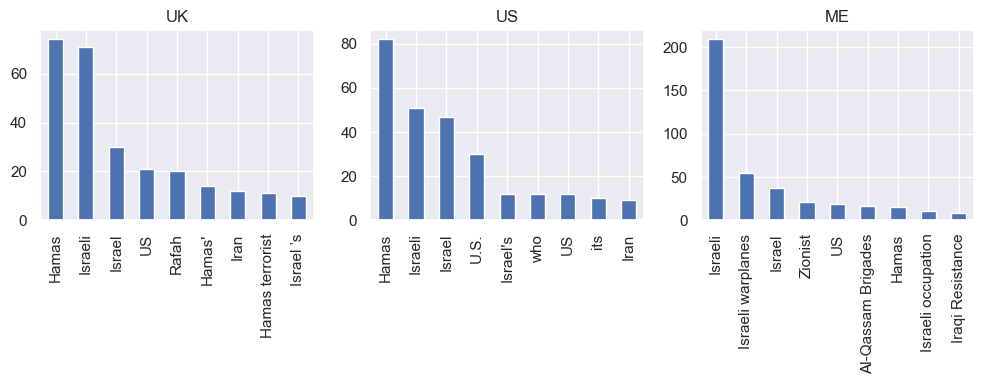

In [158]:
sns.set(font_scale=1)
plt.figure(figsize=(10,4))
list_ = [(uk, "UK"), (us, "US"), (me, "ME")]
for index, (dataframe, region) in enumerate(list_): 
    plt.subplot(1,3, index+1)
    dataframe.plot(kind='bar', title=region, xlabel='')
plt.tight_layout()
plt.savefig("../data/figures/semantic_frames_region.png", dpi=300)
    


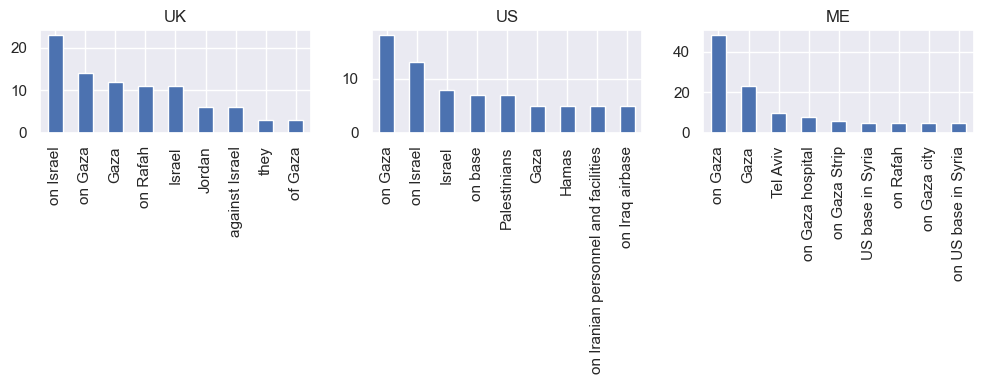

In [165]:
sns.set(font_scale=1)
plt.figure(figsize=(10,4))
list_ = [(uk, "UK"), (us, "US"), (me, "ME")]
for index, (dataframe, region) in enumerate(list_): 
    plt.subplot(1,3, index+1)
    dataframe.plot(kind='bar', title=region, xlabel='')
plt.tight_layout()
plt.savefig("../data/figures/victim_semantic_frames_region.png", dpi=300)

# Causation
### Looking at frame elements

{'Sentence': [], 'timestamp': [], 'Actor': [], 'Affected': [], 'Cause': [], 'Circumstances': [], 'Effect': [], 'Explanation': []}
Sentence 181
timestamp 181
Actor 181
Affected 181
Cause 181
Circumstances 181
Effect 181
Explanation 181
Cause
                                                         30
Israel-Hamas war                                         12
that                                                      7
hostage releases                                          6
the war in Gaza                                           4
TikTok                                                    3
Iran's strikes in Iraq, Syria and Pakistan                2
A series of attacks in the Middle East this past week     2
U.S. strikes in Iraq, Syria and Yemen                     2
the bipartisan spending framework                         2
Name: count, dtype: int64


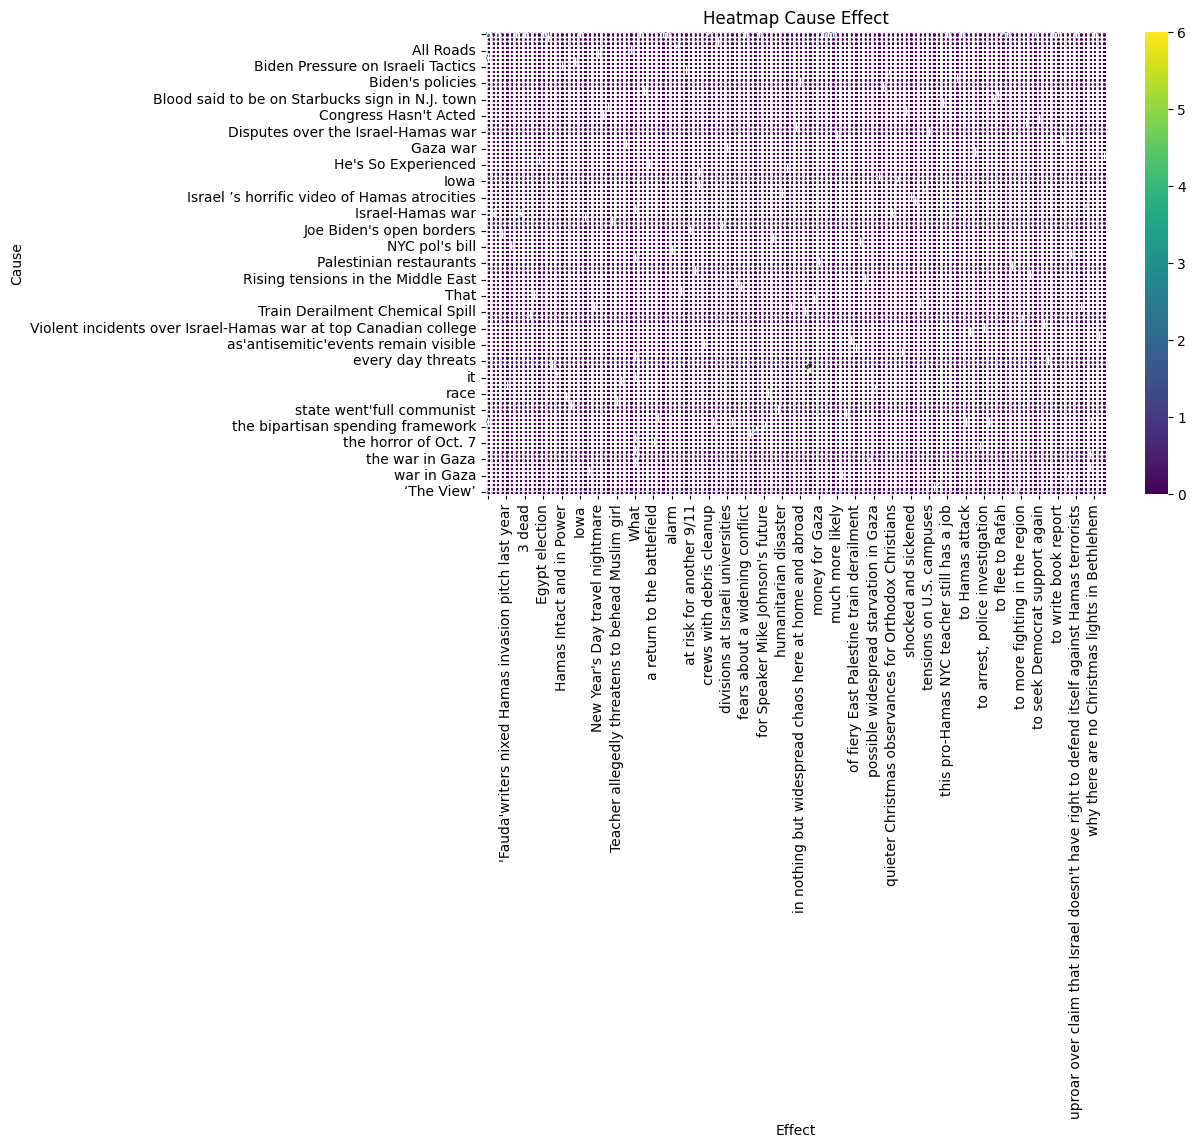

In [368]:
rows = get_frame_elements(frames_US,'Cause_Harm',['Actor', 'Affected', 'Cause', 'Circumstances',  'Effect', 'Explanation'])
for element in rows: 
    print(element,len(rows[element]))
df = pd.DataFrame(rows)
df.head()
df['month'] = pd.to_datetime(df.timestamp).dt.month_name()
print(df.Cause.value_counts()[:10])
#filtered_df_assailant = df[df['Assailant'].apply(lambda x: x in ["Hamas", "Gaza", "Israel","Israel's", "Hamas terrorist"])]
#filtered_df_victim = df[df['Victim'].apply(lambda x: x in ["Hamas", "Gaza","Israel", "Israel's", "Hamas terrorist"])]
#plt.hist(filtered_df_assailant.month.values,filtered_df_assailant.Assailant.values)

"""
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='Assailant', data=filtered_df_assailant, palette='viridis')
plt.title('Assailant Activity by Month')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='Victim', data=filtered_df_victim, palette='viridis')
plt.title('Victim by Month')
plt.show()"""

pivot_table = df.pivot_table(index='Cause', columns='Effect', aggfunc='size', fill_value=0)

# Then, create a heatmap from the pivot table
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Heatmap Cause Effect')
plt.show()

In [ ]:
"""
df = pd.read_csv(filename)
    frame_transformer = FrameSemanticTransformer(batch_size=16) 
    
    iterator = chunks(df, 16)
    pickle_obj = {"indices": [], "frame_semantics": []} 
    for chunk in iterator:
        print(chunk)
        try:
            maintext = chunk.maintext.values
            result = frame_transformer.detect_frames_bulk(chunk.title.values)
        except Exception as e: 
            logger.error(e)
        else: 
            indices = list(chunk.index)
            pickle_obj["indices"].extend(indices)
            pickle_obj["frame_semantics"].extend(result) 
            pickle.dump(pickle_obj, file = open(f"./data/processed/frame_semantics_{region}.pickle", "wb"))
            break"""

In [167]:
from nltk.corpus.reader.framenet import PrettyList
from nltk.corpus import framenet as fn
from nltk.corpus.reader.framenet import PrettyList
from operator import itemgetter
from pprint import pprint

x = fn.frames("Causation")
x.sort(key=itemgetter('ID'))
x[0]

frame (5): Causation

[URL] https://framenet2.icsi.berkeley.edu/fnReports/data/frame/Causation.xml

[definition]
  A Cause causes an Effect.  Alternatively, an Actor, a participant
  of a (implicit) Cause, may stand in for the Cause.  The entity
  Affected by the Causation may stand in for the overall Effect
  situation or event.   '' Those frames that inherit the Causation
  frame have as their background the idea that some event is
  responsible for the occurrence of another event (or state).  In
  the  inheriting frame, typically an FE like Agent or Causer is
  proposed in the place of the Actor, but in the daughter frames,
  as in this frame, the Actor is semantically dependent on the idea
  of a Cause (an event or state-of-affairs) that the Actor is a
  participant in.  Similarly, most inheriting frames profile only
  the Affected entity, not the full Effect situation which is often
  incorporated into the frame or the particular target.  So, for
  example, paint.v in the Filling 

In [204]:
f = fn.frame(5)

In [206]:
print(sorted([x for x in f.FE]))

['Actor', 'Affected', 'Cause', 'Circumstances', 'Concessive', 'Effect', 'Explanation', 'Frequency', 'Manner', 'Means', 'Place', 'Time']


In [169]:
x = fn.frames("Attack")
x.sort(key=itemgetter('ID'))
print(x)
f = fn.frame(424)
print(sorted([x for x in f.FE]))

[<frame ID=424 name=Attack>]
['Assailant', 'Circumstances', 'Containing_event', 'Depictive', 'Direction', 'Duration', 'Event_description', 'Explanation', 'Frequency', 'Iterations', 'Manner', 'Means', 'Particular_iteration', 'Path', 'Place', 'Purpose', 'Re-encoding', 'Result', 'Source', 'Time', 'Victim', 'Weapon']


In [211]:
x = fn.frames("Cause_harm")
x.sort(key=itemgetter('ID'))
print(x)
f = fn.frame(112)
print(sorted([x for x in f.FE]))

[<frame ID=112 name=Cause_harm>]
['Agent', 'Body_part', 'Cause', 'Circumstances', 'Concessive', 'Containing_event', 'Degree', 'Depictive', 'Duration', 'Explanation', 'Frequency', 'Instrument', 'Iterations', 'Manner', 'Means', 'Particular_iteration', 'Period_of_iterations', 'Place', 'Purpose', 'Re-encoding', 'Result', 'Subregion_bodypart', 'Time', 'Victim']


In [213]:
x = fn.frames("Kinship")
x.sort(key=itemgetter('ID'))
print(x)
f = fn.frame(104)
print(sorted([x for x in f.FE]))

[<frame ID=104 name=Kinship>]
['Alter', 'Degree', 'Descriptor', 'Ego', 'Relatives']


In [215]:
x = fn.frames("Killing")
x.sort(key=itemgetter('ID'))
print(x)
f = fn.frame(590)
print(sorted([x for x in f.FE]))

[<frame ID=590 name=Killing>]
['Beneficiary', 'Cause', 'Circumstances', 'Containing_event', 'Degree', 'Depictive', 'Explanation', 'Frequency', 'Instrument', 'Killer', 'Manner', 'Means', 'Period_of_iterations', 'Place', 'Purpose', 'Result', 'Time', 'Victim']


In [218]:
x = fn.frames("Hostile_encounter")
x.sort(key=itemgetter('ID'))
print(x)
f = fn.frame(93)
print(sorted([x for x in f.FE]))

[<frame ID=93 name=Hostile_encounter>]
['Degree', 'Depictive', 'Duration', 'Explanation', 'Instrument', 'Internal_cause', 'Issue', 'Manner', 'Means', 'Particular_iteration', 'Place', 'Purpose', 'Result', 'Side_1', 'Side_2', 'Sides', 'Time']


In [220]:
x = fn.frames("Quantified_mass")
x.sort(key=itemgetter('ID'))
print(x)
f = fn.frame(189)
print(sorted([x for x in f.FE]))

[<frame ID=189 name=Quantified_mass>]
['Degree', 'Individuals', 'Mass', 'Q_prop', 'Quantity']
